In [1]:
import yfinance as yf

In [2]:
import pandas as pd

In [3]:
import numpy as np


In [4]:
import matplotlib.pyplot as plt


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import LSTM, Dense

In [9]:
from tensorflow.keras.optimizers import Adam


In [10]:
# Fetch historical stock data from Yahoo Finance
stock_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [11]:
# Preprocess the data
data = data[['Adj Close']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [12]:
# Create sequences for LSTM
sequence_length = 10
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [16]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [17]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
76/76 [==============================] - 4s 18ms/step - loss: 0.0049 - val_loss: 1.2622e-04
Epoch 2/100
76/76 [==============================] - 1s 10ms/step - loss: 1.6591e-04 - val_loss: 9.9878e-05
Epoch 3/100
76/76 [==============================] - 1s 10ms/step - loss: 1.5729e-04 - val_loss: 1.0267e-04
Epoch 4/100
76/76 [==============================] - 1s 10ms/step - loss: 1.6418e-04 - val_loss: 1.0199e-04
Epoch 5/100
76/76 [==============================] - 1s 11ms/step - loss: 1.5395e-04 - val_loss: 1.1360e-04
Epoch 6/100
76/76 [==============================] - 1s 11ms/step - loss: 1.6757e-04 - val_loss: 1.0476e-04
Epoch 7/100
76/76 [==============================] - 1s 10ms/step - loss: 1.5879e-04 - val_loss: 9.2493e-05
Epoch 8/100
76/76 [==============================] - 1s 12ms/step - loss: 1.7285e-04 - val_loss: 1.1132e-04
Epoch 9/100
76/76 [==============================] - 1s 14ms/step - loss: 1.7277e-04 - val_loss: 1.0274e-04
Epoch 10/100
76/76 [============

In [21]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)


19/19 [==============================] - 0s 3ms/step


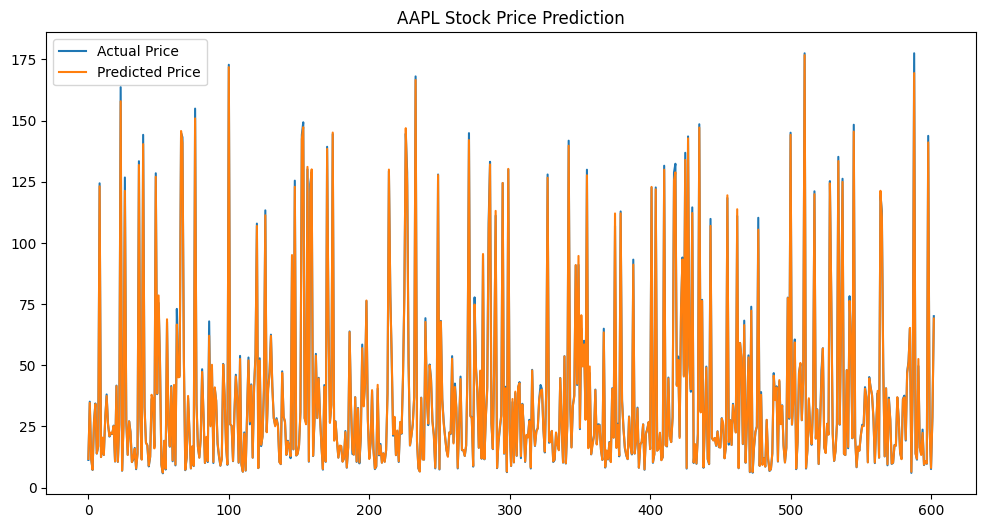

In [22]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.show()